# Clustering on Credit Card Dataset with PyCaret

Clustering is the task of grouping a set of objects in such a way that those in the same group (called a cluster) are more similar to each other than to those in other groups.

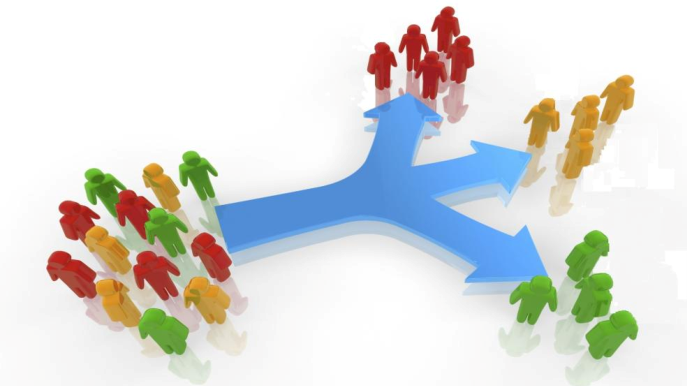
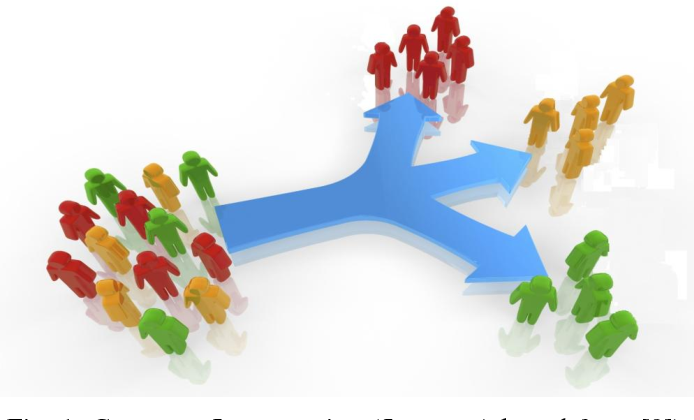

# Problem Statement
This case requires developing a customer segmentation to define a marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit cardholders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset:

- CUSTID: Identification of Credit Cardholder (Categorical)
- BALANCE: Balance amount left in their account to make purchases
- BALANCEFREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES: Amount of purchases made from the account
- ONEOFFPURCHASES: Maximum purchase amount did in one-go
- INSTALLMENTSPURCHASES: Amount of purchase done in installment
- CASH ADVANCE: Cash in advance given by the user
- PURCHASESFREQUENCY: How frequently the Purchases are being made score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY: How frequently is the cash in advance being paid
- CASHADVANCETRX: Number of Transactions made with "Cash in Advanced"
- PURCHASESTRX: Number of purchase transactions made
- CREDIT LIMIT: Limit of Credit Card for user
- PAYMENTS: Amount of Payment done by the user
- MINIMUM_PAYMENTS: Minimum amount of payments made by the user
- PRCFULLPAYMENT: Percent of full payment paid by the user
- TENURE: Tenure of credit card service for user

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/ccdata/CC GENERAL.csv


In [2]:
data= pd.read_csv('/kaggle/input/ccdata/CC GENERAL.csv')
data

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

In [3]:
data.describe().T

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8637.0   864.206542  2372.446607   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   169.123707   312.343947   825.485459   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

In [4]:
data.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

In [5]:
cat_col = data.select_dtypes(include=['object']).columns
num_col = data.select_dtypes(exclude=['object']).columns

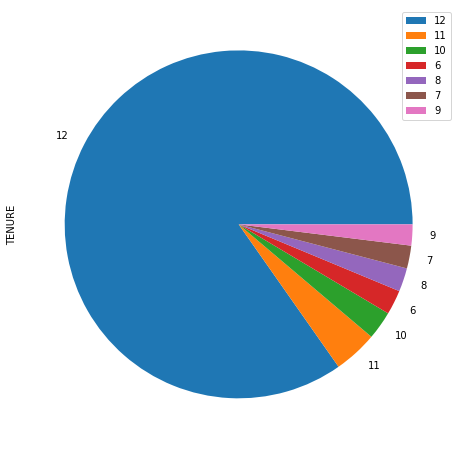

In [6]:
df_v=pd.DataFrame(data['TENURE'].value_counts())
plot = df_v.plot.pie(y='TENURE', figsize=(8, 8));

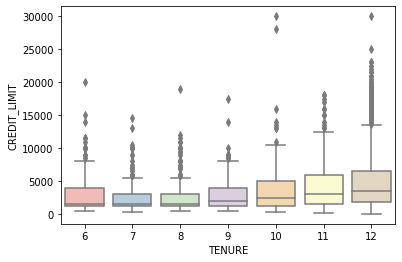

In [7]:
sns.boxplot(x = 'TENURE', y = 'CREDIT_LIMIT', data = data,palette='Pastel1');

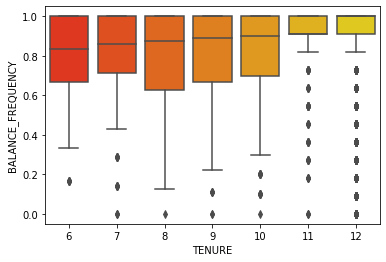

In [8]:
sns.boxplot(x = 'TENURE', y = 'BALANCE_FREQUENCY', data = data,palette='autumn');

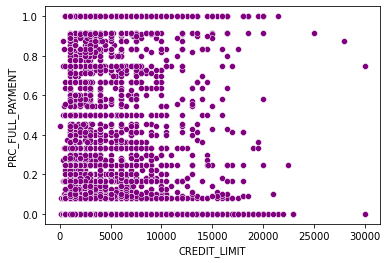

In [9]:
sns.scatterplot(x='CREDIT_LIMIT', y='PRC_FULL_PAYMENT', data=data,color='purple');

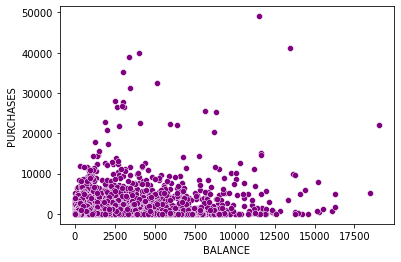

In [10]:
sns.scatterplot(x='BALANCE', y='PURCHASES', data=data,color='purple');

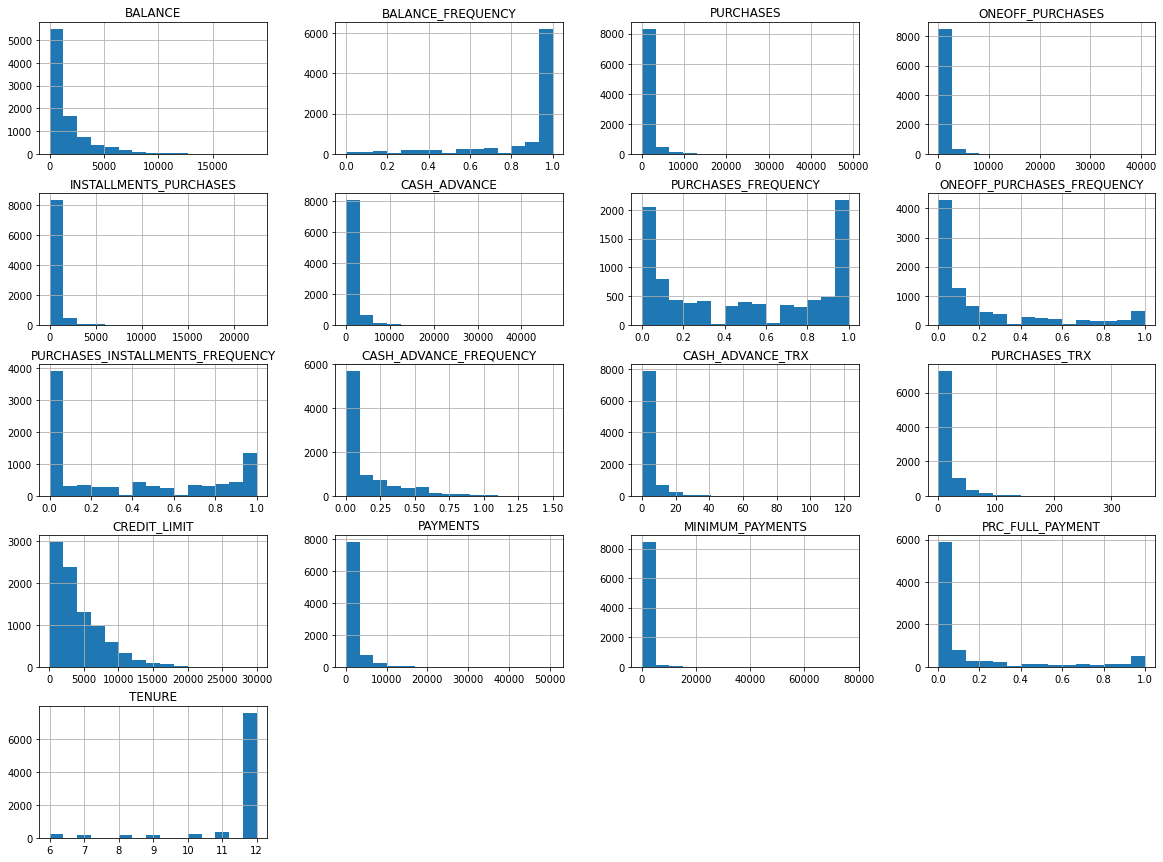

In [11]:
data[num_col].hist(bins=15, figsize=(20, 15), layout=(5, 4));

In [12]:
data[num_col].corr()

BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                           1.000000           0.322412   0.181261   
BALANCE_FREQUENCY                 0.322412           1.000000   0.133674   
PURCHASES                         0.181261           0.133674   1.000000   
ONEOFF_PURCHASES                  0.164350           0.104323   0.916845   
INSTALLMENTS_PURCHASES            0.126469           0.124292   0.679896   
CASH_ADVANCE                      0.496692           0.099388  -0.051474   
PURCHASES_FREQUENCY              -0.077944           0.229715   0.393017   
ONEOFF_PURCHASES_FREQUENCY        0.073166           0.202415   0.498430   
PURCHASES_INSTALLMENTS_FREQUENCY -0.063186           0.176079   0.315567   
CASH_ADVANCE_FREQUENCY            0.449218           0.191873  -0.120143   
CASH_ADVANCE_TRX                  0.385152           0.141555  -0.067175   
PURCHASES_TRX                     0.154338           0.189626   0.689561   
CREDIT_LIMIT                      0.531283           0.095843   0.356963   
PAYMENTS                          0.322802           0.065008   0.603264   
MINIMUM_PAYMENTS                  0.398684           0.132569   0.093860   
PRC_FULL_PAYMENT                 -0.318959          -0.095082   0.180379   
TENURE                            0.072692           0.119776   0.086288   

                                  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
BALANCE                                   0.164350                0.126469   
BALANCE_FREQUENCY                         0.104323                0.124292   
PURCHASES                                 0.916845                0.679896   
ONEOFF_PURCHASES                          1.000000                0.330622   
INSTALLMENTS_PURCHASES                    0.330622                1.000000   
CASH_ADVANCE                             -0.031326               -0.064244   
PURCHASES_FREQUENCY                       0.264937                0.442418   
ONEOFF_PURCHASES_FREQUENCY                0.524891                0.214042   
PURCHASES_INSTALLMENTS_FREQUENCY          0.127729                0.511351   
CASH_ADVANCE_FREQUENCY                   -0.082628               -0.132318   
CASH_ADVANCE_TRX                         -0.046212               -0.073999   
PURCHASES_TRX                             0.545523                0.628108   
CREDIT_LIMIT                              0.319724                0.256499   
PAYMENTS                                  0.567292                0.384084   
MINIMUM_PAYMENTS                          0.048755                0.132172   
PRC_FULL_PAYMENT                          0.132763                0.182569   
TENURE                                    0.064150                0.086143   

                                  CASH_ADVANCE  PURCHASES_FREQUENCY  \
BALANCE                               0.496692            -0.077944   
BALANCE_FREQUENCY                     0.099388             0.229715   
PURCHASES                            -0.051474             0.393017   
ONEOFF_PURCHASES                     -0.031326             0.264937   
INSTALLMENTS_PURCHASES               -0.064244             0.442418   
CASH_ADVANCE                          1.000000            -0.215507   
PURCHASES_FREQUENCY                  -0.215507             1.000000   
ONEOFF_PURCHASES_FREQUENCY           -0.086754             0.501343   
PURCHASES_INSTALLMENTS_FREQUENCY     -0.177070             0.862934   
CASH_ADVANCE_FREQUENCY                0.628522            -0.308478   
CASH_ADVANCE_TRX                      0.656498            -0.203478   
PURCHASES_TRX                        -0.075850             0.568430   
CREDIT_LIMIT                          0.303985             0.119788   
PAYMENTS                              0.453238             0.103464   
MINIMUM_PAYMENTS                      0.140107             0.003030   
PRC_FULL_PAYMENT                     -0.152935             0.305802   
TENURE                               -0.068312        

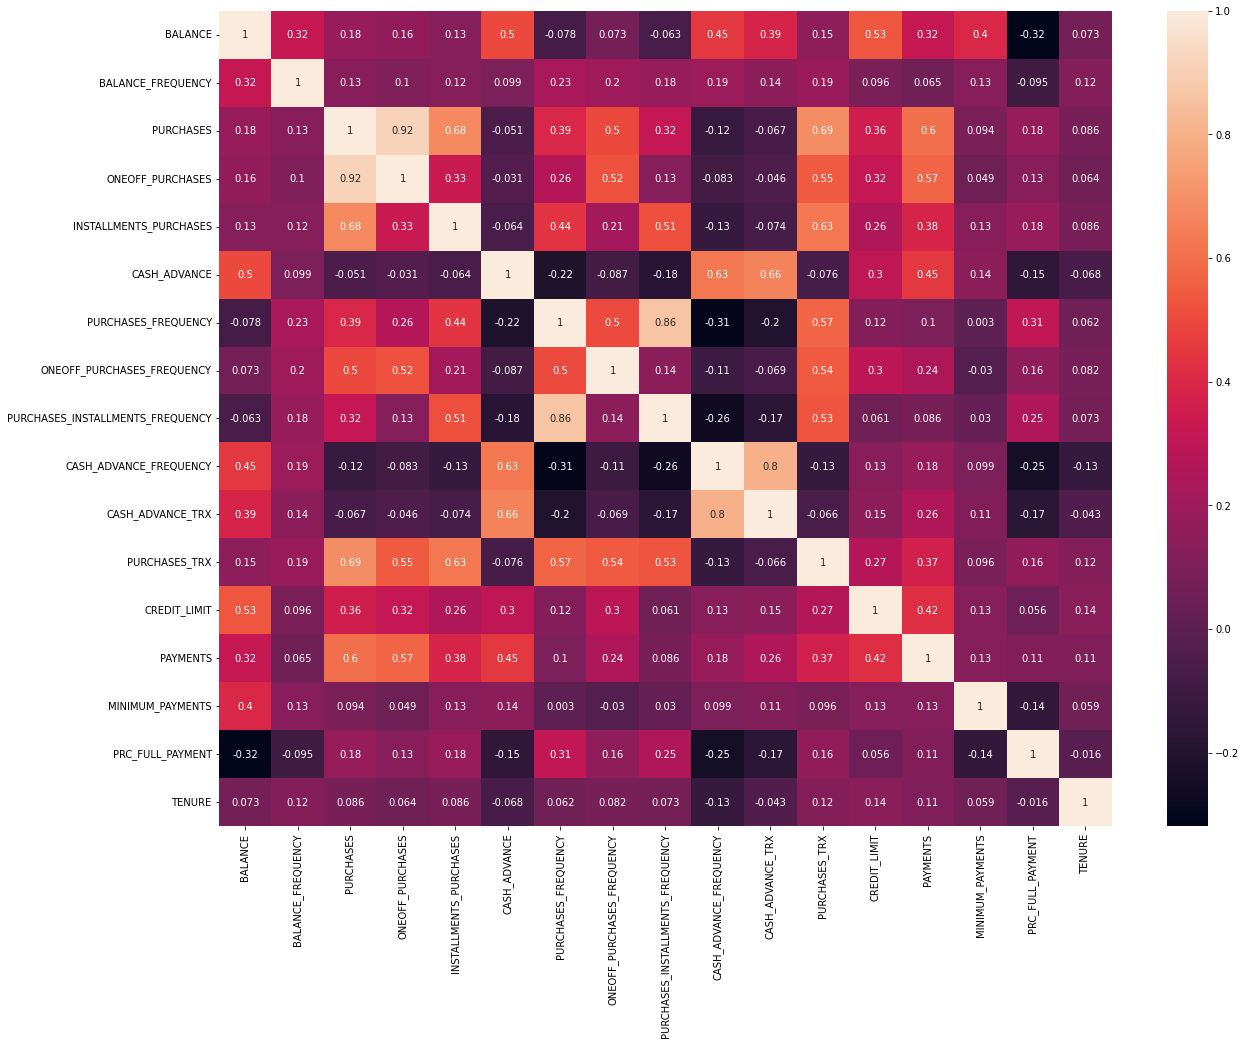

In [13]:
plt.subplots(figsize=(20,15))
sns.heatmap(data[num_col].corr(),annot = True);

## Filling in missing data with KnnImputer

In [14]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
imp_data = pd.DataFrame(imputer.fit_transform(data[num_col]),columns=data[num_col].columns)
imp_data.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [15]:
imp_data

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000               0.0            2.0        1000.0   
1                   0.250000               4.0            0.0        7000.0   
2                   0.000000               0.0           12.0        7500.0   
3                   0.083333               1.0            1.0        7500.0   
4                   0.000000               0.0            1.0        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000               0.0            6.0        1000.0   
8946                0.000000               0.0            6.0        1000.0   
8947                0.000000               0.0            5.0        1000.0   
8948                0.166667               2.0            0.0         500.0   
8949                0.333333               2.0           23.0        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000    12.0  
1     4103.032597       1072.340217          0.222222    12.0  
2      622.066742        627.284787          0.000000    12.0  
3        0.000000        379.829982          0.000000    12.0  
4      678.334763        244.791237          0.000000    12.0  
...           ...               ...               ...     ...  
8945   325.594462         48.886365          0.500000     6.0  
8946   275.861322        156.060050          0.000000     6.0  
8947    81

# Clustering with PyCaret

In [16]:
!pip install pycaret

     |████████████████████████████████| 301 kB 771 kB/s            
     |████████████████████████████████| 24.2 MB 10.5 MB/s            
     |████████████████████████████████| 167 kB 66.5 MB/s            
     |████████████████████████████████| 114 kB 70.7 MB/s            
  Preparing metadata (setup.py) ... - done
     |████████████████████████████████| 15.6 MB 60.4 MB/s            
     |████████████████████████████████| 10.4 MB 59.1 MB/s            
     |████████████████████████████████| 636 kB 52.5 MB/s            
     |████████████████████████████████| 25.9 MB 50.6 MB/s            
     |████████████████████████████████| 1.0 MB 54.1 MB/s            
     |████████████████████████████████| 184 kB 62.0 MB/s            
     |████████████████████████████████| 14.8 MB 57.9 MB/s            
     |████████████████████████████████| 79 kB 8.3 MB/s             
     |████████████████████████████████| 58 kB 5.5 MB/s             
  Preparing metadata (setup.py) ... - done
  Created w

In [17]:
from pycaret.clustering import *

In [18]:
clu = setup(imp_data, normalize = True, 
            pca = True,silent =True,
            combine_rare_levels= True,
            remove_multicollinearity= True,
            session_id = 123)

In [19]:
models()

Name  \
ID                                            
kmeans                   K-Means Clustering   
ap                     Affinity Propagation   
meanshift             Mean Shift Clustering   
sc                      Spectral Clustering   
hclust             Agglomerative Clustering   
dbscan     Density-Based Spatial Clustering   
optics                    OPTICS Clustering   
birch                      Birch Clustering   
kmodes                   K-Modes Clustering   

                                                   Reference  
ID                                                            
kmeans                        sklearn.cluster._kmeans.KMeans  
ap         sklearn.cluster._affinity_propagation.Affinity...  
meanshift              sklearn.cluster._mean_shift.MeanShift  
sc              sklearn.cluster._spectral.SpectralClustering  
hclust     sklearn.cluster._agglomerative.AgglomerativeCl...  
dbscan                        sklearn.cluster._dbscan.DBSCAN  
optics                        sklearn.cluster._optics.OPTICS  
birch                           sklearn.cluster._birch.Birch  
kmodes                                  kmodes.kmodes.KModes

## KMeans

K-means is one of the most commonly used clustering algorithms. It can cluster large-scale data quickly and effectively. “K” refers to the fixed number of clusters needed before starting the algorithm.

The K-means clustering method divides a dataset consisting of N data objects into K clusters given as input parameters. The aim is to ensure that the clusters obtained at the end of the partitioning process have maximum similarities within clusters and minimum similarities between clusters.

In [20]:
kmeans = create_model('kmeans')

Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0         0.2          1610.7828          1.5767            0           0   

   Completeness  
0             0

In [21]:
kmean_results = assign_model(kmeans)
kmean_results.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000               0.0            2.0        1000.0   
1                0.250000               4.0            0.0        7000.0   
2                0.000000               0.0           12.0        7500.0   
3                0.083333               1.0            1.0        7500.0   
4                0.000000               0.0            1.0        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE    Cluster  
0   201.802084        139.509787          0.000000    12.0  Cluster 3  
1  4103.032597       1072.340217          0.222222    12.0  Cluster 2  
2   622.066742        627.284787          0.000000    12.0  Cluster 1  
3     0.000000        379.829982          0.000000    12.0  Cluster 3  
4   678.334763        244.791237          0.000000    12.0  Cluster 3

In [22]:
plot_model(kmeans)

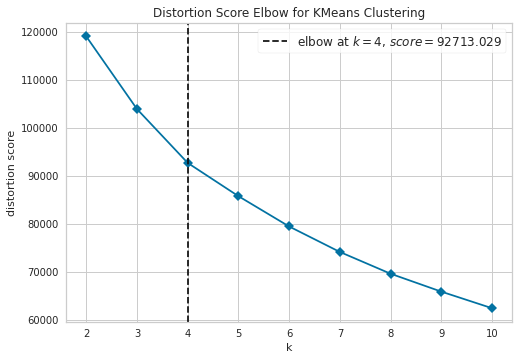

In [23]:
plot_model(kmeans, plot = 'elbow')

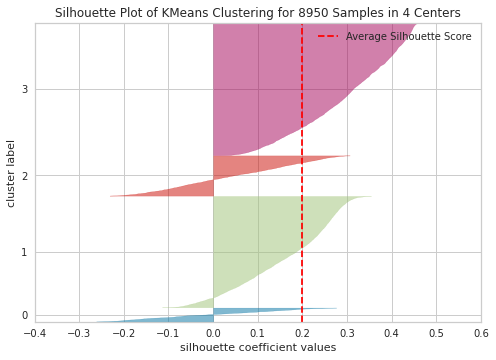

In [24]:
plot_model(kmeans, plot = 'silhouette')

In [25]:
plot_model(kmeans, plot = 'distribution') #to see size of clusters

In [26]:
plot_model(kmeans, plot = 'distribution', feature = 'TENURE')

In [27]:
plot_model(kmeans, plot = 'distribution', feature = 'PAYMENTS')

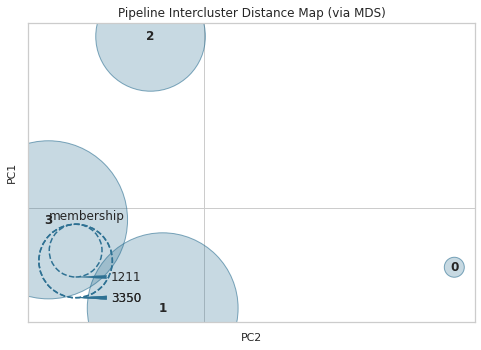

In [28]:
plot_model(kmeans, plot ='distance')

In [29]:
plot_model(kmeans, plot ='tsne')

## Hierarchical Clustering

Hierarchical clustering is a method of cluster analysis that attempts to create a hierarchy of clusters. Hierarchical clustering strategies are generally divided into two types:

1. **Agglomerative**: This is a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.
2. **Divisive**: This is a "top-down" approach: all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.

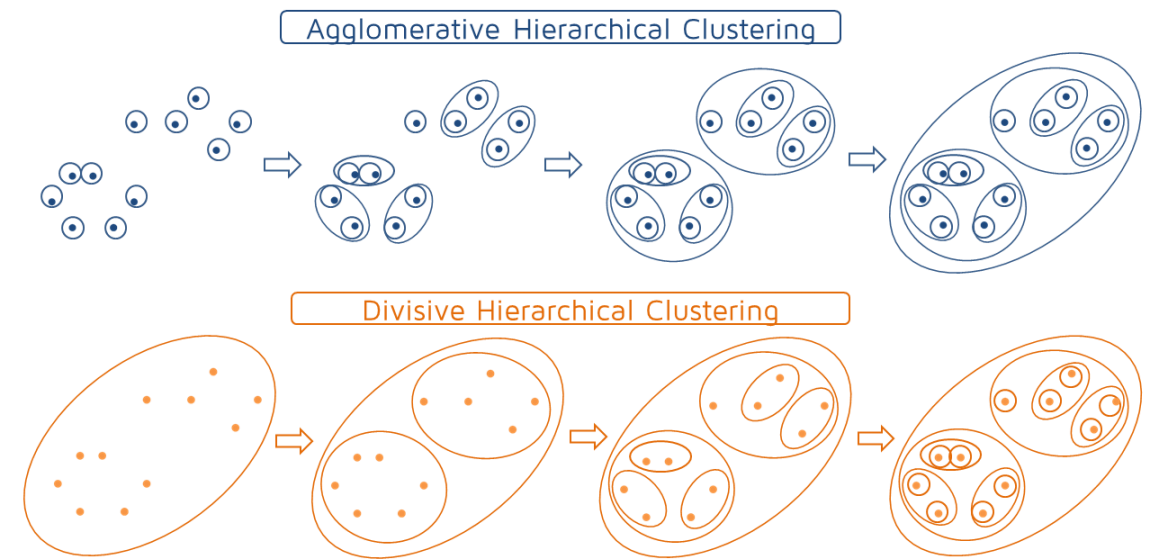

In [30]:
hierarchical_clust = create_model('hclust')

Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0       0.152          1253.3889           1.775            0           0   

   Completeness  
0             0

In [31]:
hierarchical_results = assign_model(hierarchical_clust)
hierarchical_results.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000               0.0            2.0        1000.0   
1                0.250000               4.0            0.0        7000.0   
2                0.000000               0.0           12.0        7500.0   
3                0.083333               1.0            1.0        7500.0   
4                0.000000               0.0            1.0        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE    Cluster  
0   201.802084        139.509787          0.000000    12.0  Cluster 0  
1  4103.032597       1072.340217          0.222222    12.0  Cluster 2  
2   622.066742        627.284787          0.000000    12.0  Cluster 3  
3     0.000000        379.829982          0.000000    12.0  Cluster 0  
4   678.334763        244.791237          0.000000    12.0  Cluster 0

In [32]:
plot_model(hierarchical_clust)

In [33]:
plot_model(hierarchical_clust, plot = 'distribution') #to see size of clusters

In [34]:
plot_model(hierarchical_clust, plot ='tsne')